In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import os
sns.set(style="whitegrid")

In [7]:
db_config = {
    "user": "retail_user",
    "password": "retail_password",
    "host": "localhost",
    "port": 5433,
    "db": "retail_db"
}

connection_str = f"postgresql+pg8000://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['db']}"
engine = create_engine(connection_str)

print("Движок создан и готов к подключению")


Движок создан и готов к подключению


In [8]:
query = "SELECT * FROM customer_metrics"

try:
    df = pd.read_sql(query, engine)
    print("данные загружены")
    print(f"строк: {df.shape[0]}, столбцов: {df.shape[1]}")
    display(df.head())
except Exception as e:
    print(f"еrror: {e}")


данные загружены
строк: 4372, столбцов: 4


,CustomerID,order_lines_count,revenue,avg_line_revenue
0,17850.0,312,5288.63,16.950737
1,13047.0,196,3079.10,15.709694
2,12583.0,251,7187.34,28.634821
3,13748.0,28,948.25,33.866071
4,15100.0,6,635.10,105.850000


C:\Users\user\AppData\Local\Temp\ipykernel_12244\3876396614.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top_revenue, x="CustomerID", y="revenue", palette="viridis")


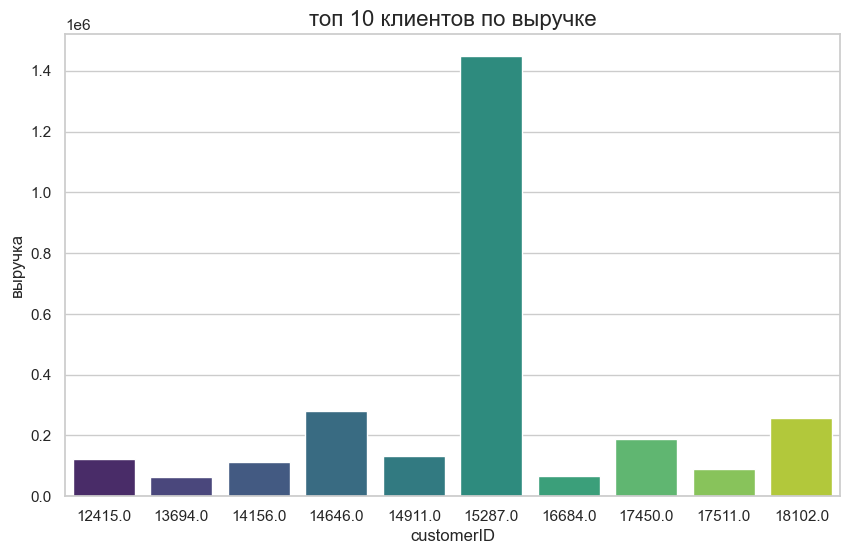

In [9]:
top_revenue = df.sort_values(by="revenue", ascending=False).head(10)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=top_revenue, x="CustomerID", y="revenue", palette="viridis")

plt.title("топ 10 клиентов по выручке", fontsize=16)
plt.xlabel("customerID", fontsize=12)
plt.ylabel("выручка", fontsize=12)
plt.xticks()
plt.show()


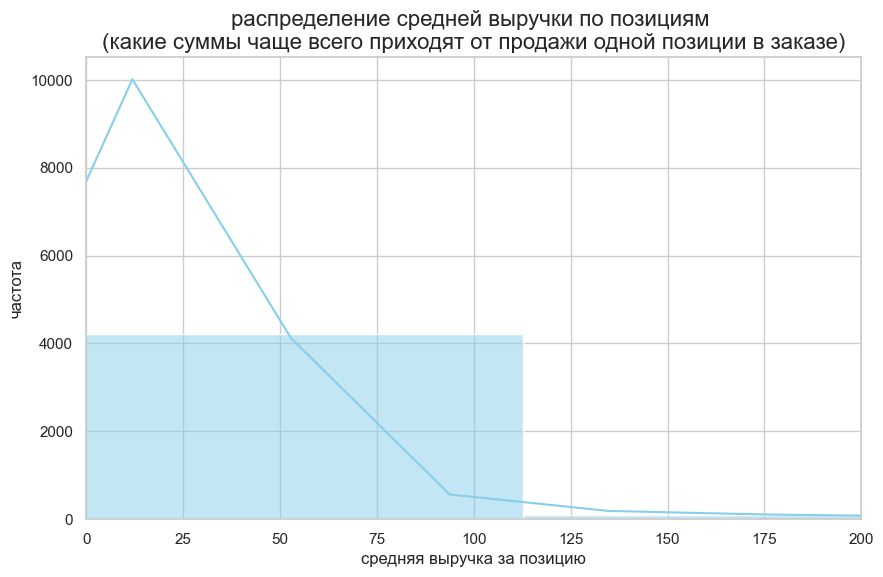

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_line_revenue'], bins=50, kde=True, color='skyblue')

plt.title("распределение средней выручки по позициям \n(какие суммы чаще всего приходят от продажи одной позиции в заказе)", fontsize=16)
plt.xlabel("средняя выручка за позицию", fontsize=12)
plt.ylabel("частота", fontsize=12)
plt.xlim(0, 200) 
plt.show()
